## Housing Price Prediction with Random Forest Case Study Yogyakarta

### 1. Load dataset

In [17]:
# import semua library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import joblib

%matplotlib inline

In [3]:
# load dataset yang sudah dibersihkan sebelumnya
dataset = pd.read_csv("rumahcom_clean.csv")
dataset.head()

,No,harga,lokasi,luas_bangunan,luas_tanah,kamar,kamar_mandi,listrik,interior,parkir,sertifikat
0,1,980290930,Sleman,90,100,3,2,1300,Tak Berperabot,2,SHM - Sertifikat Hak Milik
1,2,490000000,Sleman,60,90,3,1,1300,Tak Berperabot,1,SHM - Sertifikat Hak Milik
2,3,780293930,Sleman,84,100,3,2,1300,Tak Berperabot,2,SHM - Sertifikat Hak Milik
3,4,780939000,Sleman,84,100,3,2,1300,Tak Berperabot,1,SHM - Sertifikat Hak Milik
4,5,1799000000,Yogyakarta,154,130,3,3,2200,Tak Berperabot,2,SHM - Sertifikat Hak Milik


### 2. Data understanding

In [5]:
# Melihat tipe data yang ada di setiap field
dataset.dtypes

No                int64
harga             int64
lokasi           object
luas_bangunan     int64
luas_tanah        int64
kamar             int64
kamar_mandi       int64
listrik           int64
interior         object
parkir            int64
sertifikat       object
dtype: object

In [6]:
# mengecek jumlah data yang tidak kosong
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3348 entries, 0 to 3347
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   No             3348 non-null   int64 
 1   harga          3348 non-null   int64 
 2   lokasi         3348 non-null   object
 3   luas_bangunan  3348 non-null   int64 
 4   luas_tanah     3348 non-null   int64 
 5   kamar          3348 non-null   int64 
 6   kamar_mandi    3348 non-null   int64 
 7   listrik        3348 non-null   int64 
 8   interior       3348 non-null   object
 9   parkir         3348 non-null   int64 
 10  sertifikat     3348 non-null   object
dtypes: int64(8), object(3)
memory usage: 287.8+ KB


In [12]:
# melihat statistika deskriptif dari data
dataset.describe()

,No,harga,luas_bangunan,luas_tanah,kamar,kamar_mandi,listrik,parkir
count,3348.000000,3.348000e+03,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000,3348.000000
mean,1674.500000,5.748634e+09,156.320490,195.546296,3.662784,2.677121,2172.281959,1.770012
std,966.628677,4.991400e+10,368.089887,342.500827,2.055278,2.132591,2692.853014,1.400511
min,1.000000,1.199000e+06,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
25%,837.750000,5.750000e+08,56.000000,90.000000,2.000000,1.000000,1300.000000,1.000000
50%,1674.500000,1.100000e+09,95.000000,119.000000,3.000000,2.000000,1300.000000,1.000000
75%,2511.250000,2.000000e+09,168.000000,167.000000,4.000000,3.000000,2200.000000,2.000000
max,3348.000000,9.650000e+11,12000.000000,10500.000000,10.000000,10.000000,85000.000000,10.000000


In [33]:
# melihat korelas antar field
dataset.corr()

C:\Users\danar\AppData\Local\Temp\ipykernel_23348\3547201973.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,No,harga,luas_bangunan,luas_tanah,kamar,kamar_mandi,listrik,parkir
No,1.000000,-0.019450,0.007024,-0.001654,-0.021950,-0.027444,-0.023219,-0.022980
harga,-0.019450,1.000000,0.051869,0.050517,0.002464,-0.002046,0.052312,0.027967
luas_bangunan,0.007024,0.051869,1.000000,0.765409,0.388005,0.377134,0.713631,0.386717
luas_tanah,-0.001654,0.050517,0.765409,1.000000,0.430774,0.417537,0.640353,0.571456
kamar,-0.021950,0.002464,0.388005,0.430774,1.000000,0.904251,0.382862,0.566563
kamar_mandi,-0.027444,-0.002046,0.377134,0.417537,0.904251,1.000000,0.414814,0.559632
listrik,-0.023219,0.052312,0.713631,0.640353,0.382862,0.414814,1.000000,0.403624
parkir,-0.022980,0.027967,0.386717,0.571456,0.566563,0.559632,0.403624,1.000000


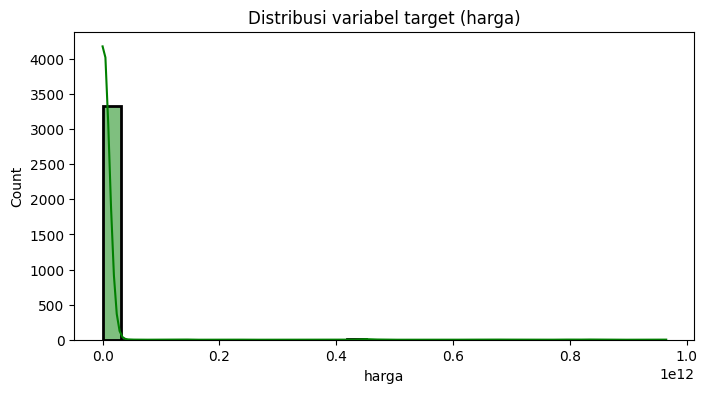

In [35]:
plt.figure(figsize=[8, 4])
sns.histplot(data=dataset, x=dataset["harga"], color='g', kde=True, edgecolor="black", linewidth=2, bins=30)
plt.title('Distribusi variabel target (harga)')
plt.show()

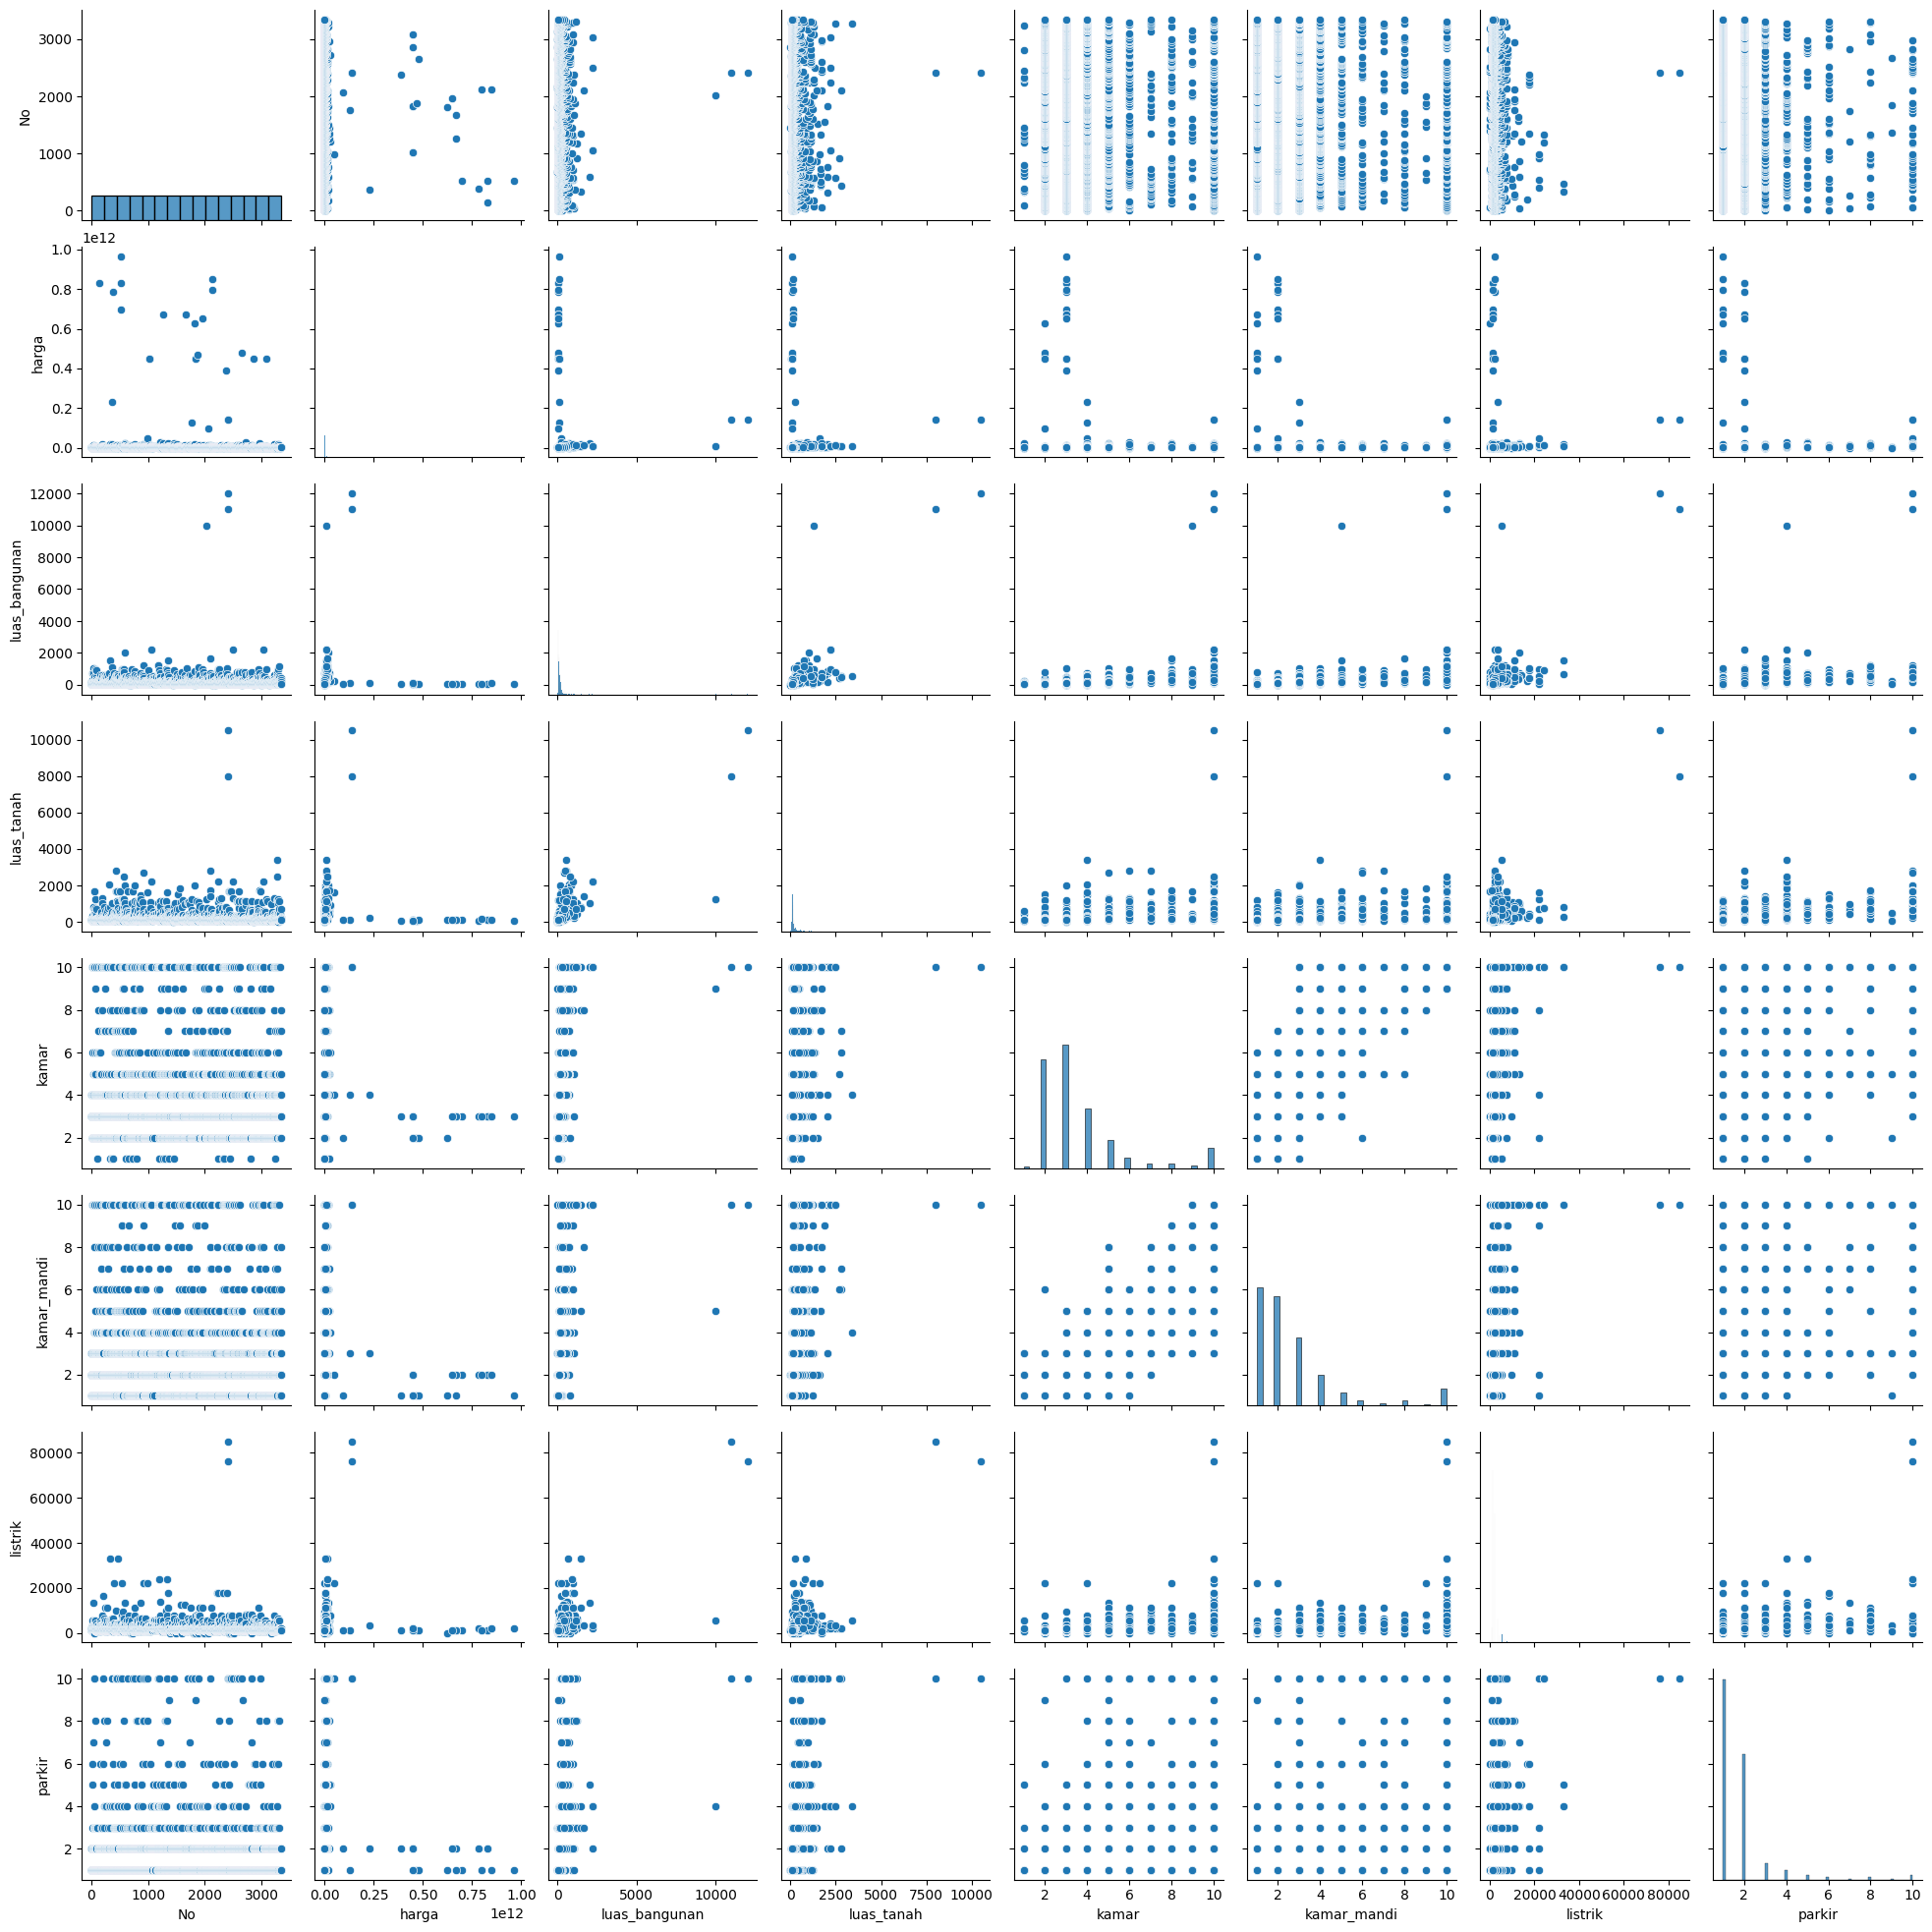

In [36]:
sns.pairplot(dataset)


### 3. Data preprocessing

In [13]:
# Melihat data null
dataset.isnull().sum()

No               0
harga            0
lokasi           0
luas_bangunan    0
luas_tanah       0
kamar            0
kamar_mandi      0
listrik          0
interior         0
parkir           0
sertifikat       0
dtype: int64